<a href="https://colab.research.google.com/github/AliHazem3/Simple-Form-of-Graduation-Project/blob/main/convolution_neural_network_binary_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.layers import Flatten, Dense, Activation, Conv2D, MaxPooling2D, Dropout
from keras.models import load_model, Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
model = Sequential()
model.add(Conv2D(32, 3, 3, input_shape = (32, 32, 3),activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/skin cancer last data/train',
                                                 target_size = (32, 32),
                                                 batch_size = 10,
                                                 class_mode = "binary")

Found 2637 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/skin cancer last data/test',
                                            target_size = (32, 32),
                                            batch_size = 32,
                                            class_mode = "binary")

Found 660 images belonging to 2 classes.


In [ ]:
hist=model.fit(training_set, validation_data = test_set, epochs = 10)

Epoch 1/10
264/264 [==============================] - 20s 75ms/step - loss: 0.3673 - accuracy: 0.8180 - val_loss: 0.3469 - val_accuracy: 0.8318
Epoch 2/10
264/264 [==============================] - 20s 77ms/step - loss: 0.3700 - accuracy: 0.8195 - val_loss: 0.3464 - val_accuracy: 0.8333
Epoch 3/10
264/264 [==============================] - 19s 72ms/step - loss: 0.3723 - accuracy: 0.8168 - val_loss: 0.3686 - val_accuracy: 0.8061
Epoch 4/10
264/264 [==============================] - 21s 80ms/step - loss: 0.3558 - accuracy: 0.8214 - val_loss: 0.3471 - val_accuracy: 0.8439
Epoch 5/10
264/264 [==============================] - 20s 75ms/step - loss: 0.3664 - accuracy: 0.8161 - val_loss: 0.3423 - val_accuracy: 0.8455
Epoch 6/10
264/264 [==============================] - 20s 74ms/step - loss: 0.3537 - accuracy: 0.8229 - val_loss: 0.3556 - val_accuracy: 0.8136
Epoch 7/10
264/264 [==============================] - 19s 71ms/step - loss: 0.3478 - accuracy: 0.8282 - val_loss: 0.3489 - val_accuracy:

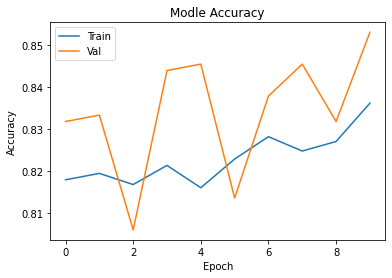

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Modle Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper left')
plt.show()